# Lead Scoring Case Study



## Business Understanding 

X Education aims to enhance its lead conversion rate by identifying high-potential leads from the numerous professionals who visit its website daily. By prioritizing communication with these "Hot Leads," the company seeks to increase its current conversion rate from 30% to a target of 80%, optimizing the efficiency of its sales team.

## Problem Statement

X Education needs to develop a model that assigns a lead score to each prospect, predicting the likelihood of conversion. The goal is to identify and focus on leads with higher conversion potential to achieve a target conversion rate of 80%.

## Game plan overview

- Importing the data
- Understanding the dataframe
- Data Preparation: Cleaning and preparing the dataset for analysis.
- Expolatory Data Analysis
- Test-Train Split
- Feature Scaling
- Model Building using RFE
- Predictions 
- Model Evaluation

In [2]:
# importing required liabraries and supressing warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")

### 1. Importing the dataset

In [3]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Understanding the dataframe

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.shape

(9240, 37)

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# 'Select' are basically the null values and converting them to 'null'

lead=lead.replace('Select',np.nan)

In [8]:
# Checking what percentage of values for a given column are null values. Intention is to drop ones with really high null values.
round(lead.isnull().sum()/len(lead)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Droping all the columns with more than 30% null values

dropna = lead.isnull().sum()
dropna =dropna[dropna.values/len(lead)>0.30]
len(dropna)

10

In [10]:
# Dropping the 10 columns with more than 30% null values

dropna1 = list(dropna.keys())  
lead = lead.drop(dropna1,axis=1) 

In [11]:
round(lead.isnull().sum()/len(lead)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### 3. Data Preparation: cleaning and data transformation

**Imputing the missing values:** 

As you will notice later that for each column there are few missing values which can be replaced with the most occuring unique value for that column. This is possible because as we make a small addition to the already large pool of that single type of value relative to other values it does not impact our further analysis much i.e., does not bias the data while retaining as much initial information as possible.



In [12]:
# As explained above checking for the unique value to replace with.

In [13]:
lead['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

**Note**: "Goolge' and 'google' are two entries and make sure that later we treat both as same

In [14]:
lead['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [15]:
lead['Page Views Per Visit'].value_counts()


Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [16]:
lead['Last Activity'].value_counts()


Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [17]:
lead['Country'].value_counts()


Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [18]:
lead['What is your current occupation'].value_counts()


What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [19]:
lead['What matters most to you in choosing a course'].value_counts()


What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [20]:
miss_vals={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened', 'Country':'India',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}
lead=lead.fillna(value=miss_vals)

In [21]:
lead.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [22]:
# Treating 'goolge' and 'Google' as 'Google'

lead['Lead Source']=lead['Lead Source'].apply(lambda x:x.capitalize())
lead['Lead Source'].value_counts()

Lead Source
Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: count, dtype: int64

#### Converting categorical variables to numerical variables

In [23]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [24]:
for feature in ['Do Not Email', 'Do Not Call','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
    lead[feature] = lead[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


#### Dummy Variables

- Create dummy variables for categorical variables and deop the first one
- add the dummy variables to the main dataset
- Remove the now redundant variable

In [25]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Number                                    9240 non-null   int64 
 2   Lead Origin                                    9240 non-null   object
 3   Lead Source                                    9240 non-null   object
 4   Do Not Email                                   9240 non-null   int64 
 5   Do Not Call                                    9240 non-null   int64 
 6   Converted                                      9240 non-null   int64 
 7   TotalVisits                                    9240 non-null   object
 8   Total Time Spent on Website                    9240 non-null   int64 
 9   Page Views Per Visit                           9240 non-null   

In [26]:
dummy = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)
dummy = dummy.astype(int)
lead = pd.concat([lead, dummy], axis=1)

In [27]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


#### Dropping country

Since the spread between leads from India vs other countries is obnoxiously high no single country other than India representing more than 1%. This is an extreme bias/outlier. It is best to drop this column as it will not fetch any useful information in our analysis. 

In [28]:
country_counts = lead['Country'].value_counts()
print(country_counts)

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [29]:
country_percentage = lead['Country'].value_counts(normalize=True) * 100

print(country_percentage)

Country
India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

In [30]:
lead = lead.drop('Country', axis=1)

#### Dropping columns that store redundant information or have already been transformed.

In [31]:
reduntant=['Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']
lead=lead.drop(reduntant,axis=1)
redundant1=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']
lead=lead.drop(redundant1,axis=1)

In [32]:
lead.shape

(9240, 77)

#### Converting data type to float for numerical values

In [33]:
lead['TotalVisits']=lead['TotalVisits'].astype('float')
lead['Page Views Per Visit']=lead['Page Views Per Visit'].astype('float')

In [34]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Lead Number                                                              9240 non-null   int64  
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   Converted                                                                9240 non-null   int64  
 5   TotalVisits                                                              9240 non-null   float64
 6   Total Time Spent on Website                                             

### 4. Exploratory data analysis

#### Outliers

We will see that there are outliers for three of the columns. We will try to visualise them and treat them accordingly. 

Dropping outliers is not possible as it will affect the overall outcome and we will also lose some important information from the data we will treat the outliers by creating `bins`.

In [35]:
# Checking the presence of outliers at using percentiles
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.000108,0.000108,0.000433,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,23405.995698,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.010403,0.010403,0.020803,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,650506.100000,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,655404.050000,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,659592.980000,1.000000,0.000000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


**Note:** We are not considering 'Total time spent on website' as an outlier because as you can see that for each percentile the values are consistenly increasing. 

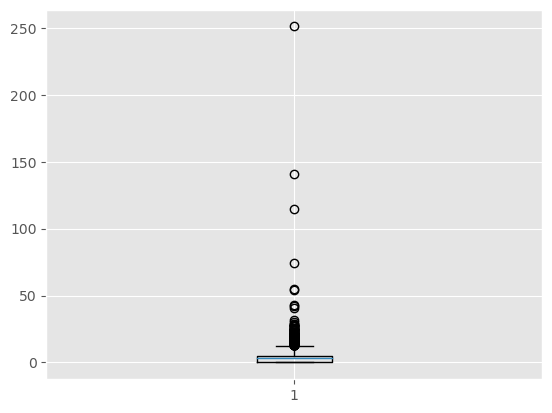

In [36]:
plt.boxplot(lead['TotalVisits'])
plt.show()

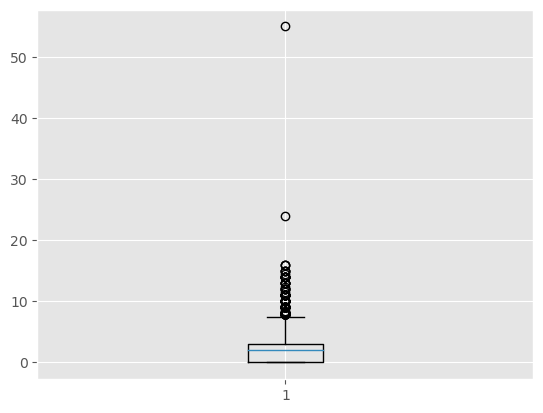

In [37]:
plt.boxplot(lead['Page Views Per Visit'])
plt.show()

In [38]:
# Creating bins and assigning binary values.

# TotalVisits
bins_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

for i in range(len(list(bins_total_visits.keys()))):
    lead[list(bins_total_visits.keys())[i]]=lead['TotalVisits'].map(lambda x: 1 if (x < list(bins_total_visits.values())[i] and x >= (list(bins_total_visits.values())[i] - 50)) else 0)

# Page Views Per Visit
bins_page_visits_={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

for i in range(len(list(bins_page_visits_.keys()))):
    lead[list(bins_page_visits_.keys())[i]]=lead['Page Views Per Visit'].map(lambda x: 1 if (x < list(bins_page_visits_.values())[i] and x >= (list(bins_page_visits_.values())[i] - 10)) else 0)

 

In [39]:
# removing the original colummns 
original=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']
lead=lead.drop(original,axis=1)

In [40]:
lead.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,No,No,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,674,No,No,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,1532,No,No,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,305,No,No,0,0,...,0,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,1428,No,No,0,0,...,0,0,1,0,0,0,1,0,0,0


In [41]:
# Converting search and newspaper article from 'yes' and 'no' type to binary form
lead['Search'] = lead['Search'].map({'Yes': 1, 'No': 0})
lead['Newspaper Article'] = lead['Newspaper Article'].map({'Yes': 1, 'No': 0})

# Now the columns should already be in integer format
lead.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,674,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,1532,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,305,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,1428,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
lead['Search'].head()

0    0
1    0
2    0
3    0
4    0
Name: Search, dtype: int64

In [43]:
lead = lead.drop(['Prospect ID'], axis=1)

### 5. Test-Train split

In [44]:
y=lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
X=lead.drop('Converted',axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,660727,0,0,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,660719,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,660681,0,0,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [46]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 6.Feature Scaling

In [47]:
scaler=StandardScaler() 

In [48]:
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Lead Number,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,641410,0,0,-0.885371,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,597687,0,0,0.005716,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3516,626825,0,0,-0.691418,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,587928,0,0,1.365219,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3934,622366,0,0,-0.885371,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [49]:
# Checking the conversion rate
(sum(y)/len(y.index))*100

38.53896103896104

#### Correlation in the dataset

We will check for correlations. Also remove the dummy variables with extremly high correlation that represent redundancy.

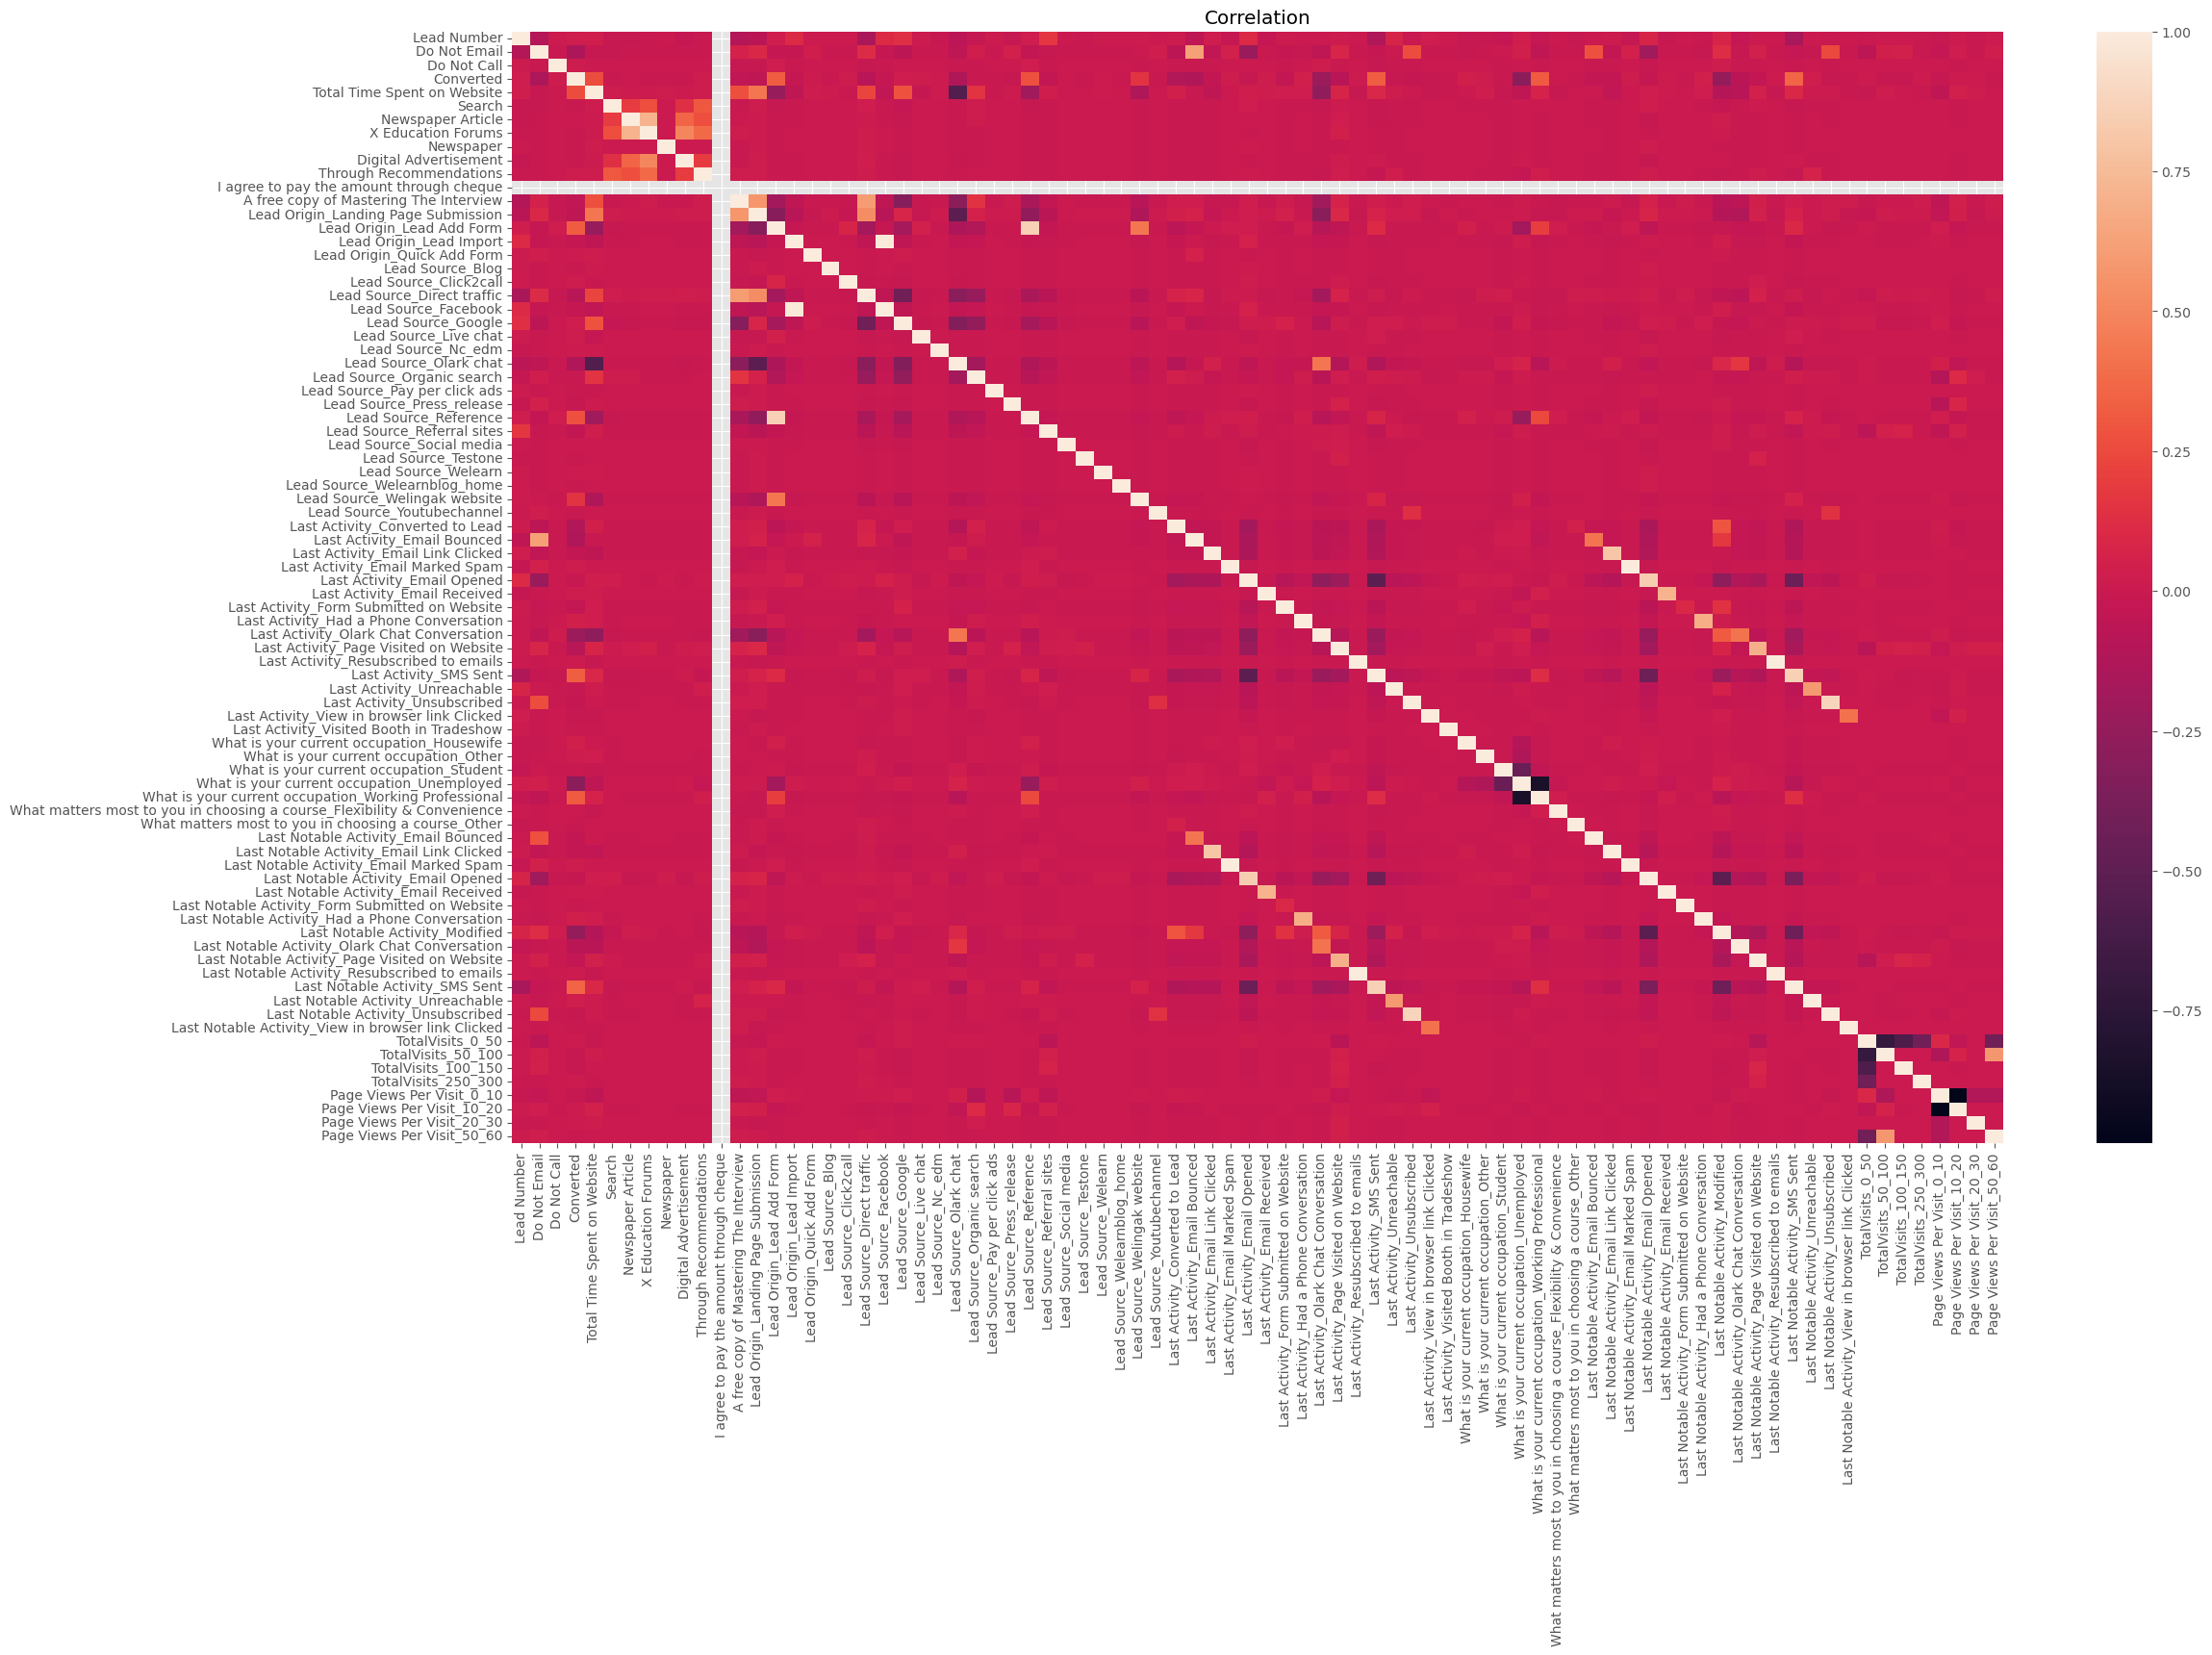

In [50]:
plt.figure(figsize=(25,15))

plt.title('Correlation')
sns.heatmap(lead.corr(method='spearman'))
plt.show()

In [51]:
red_corr=['Lead Source_Olark chat','What is your current occupation_Unemployed']
X_train=X_train.drop(red_corr,axis=1)      
X_test=X_test.drop(red_corr,axis=1) 

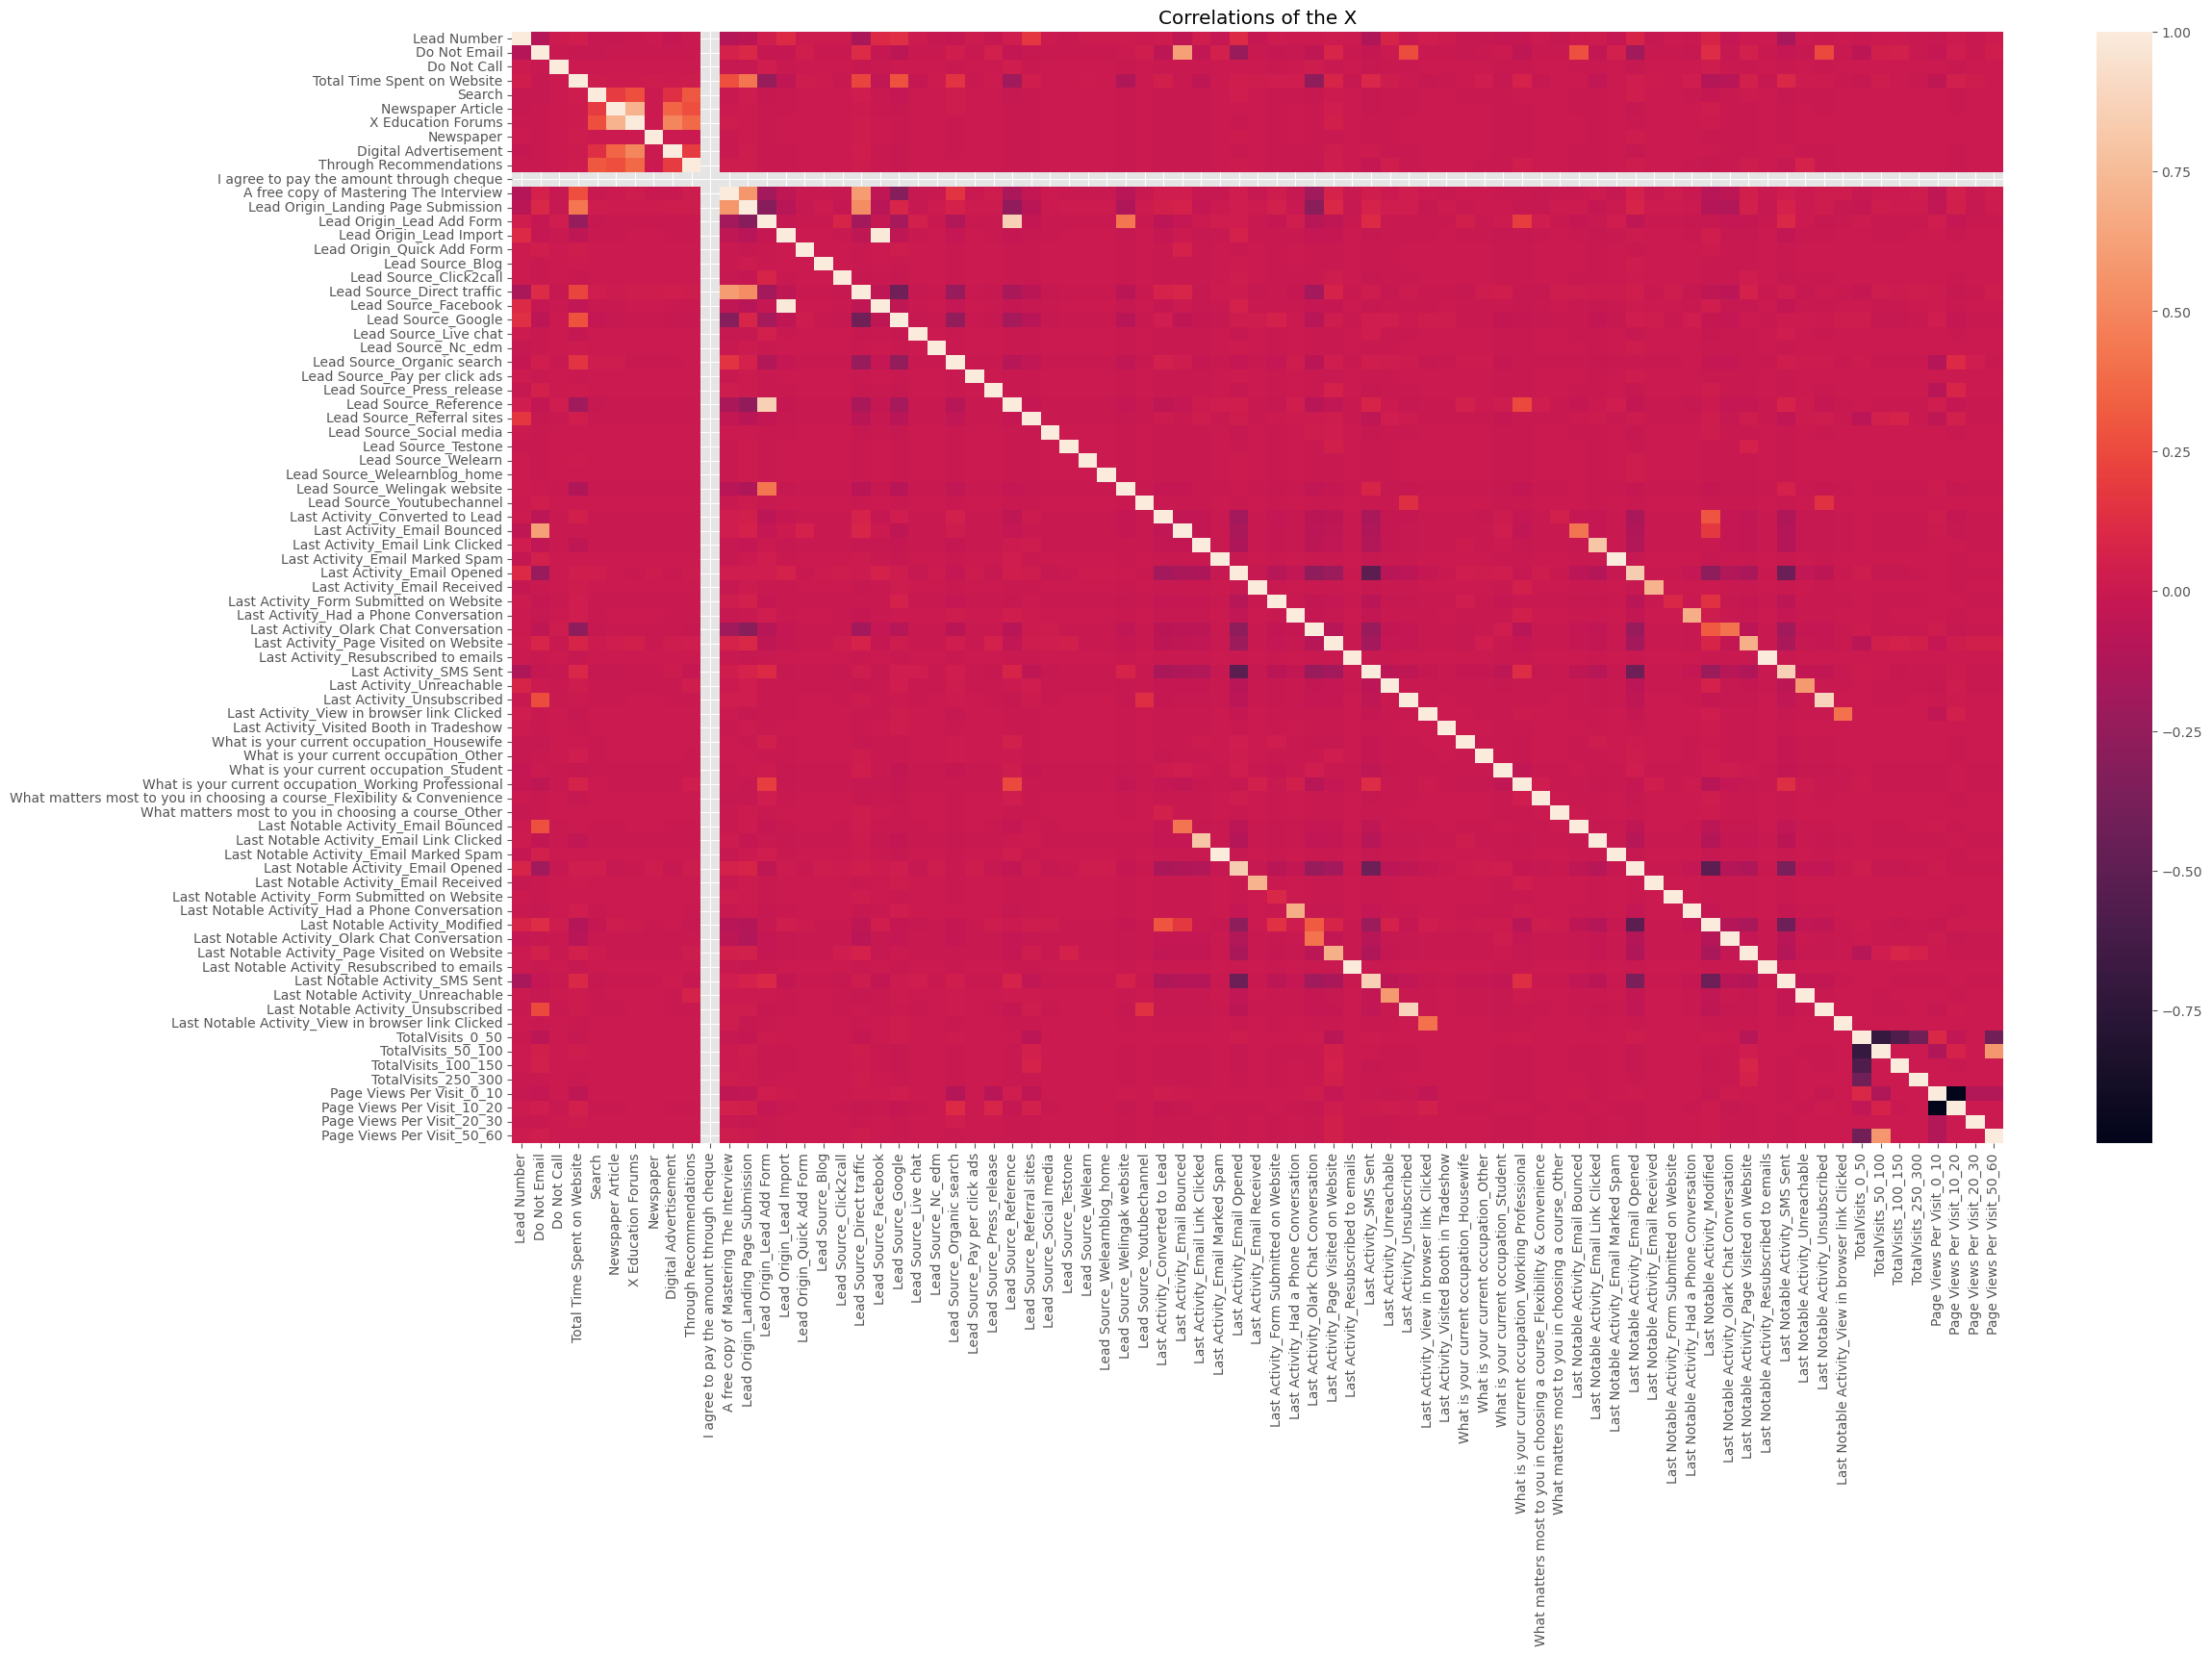

In [53]:
# Plot the heatmap with the existing columns
plt.figure(figsize=(25,15))
plt.title('Correlations of the X')
sns.heatmap(lead[X_train.columns].corr(method='spearman'))
plt.show()

### Building model using RFE

In [55]:
lin_reg=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
lin_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6396
Model Family:                Gaussian   Df Model:                           71
Link Function:               Identity   Scale:                         0.13591
Method:                          IRLS   Log-Likelihood:                -2687.2
Date:                Sun, 18 Aug 2024   Deviance:                       869.27
Time:                        13:34:15   Pearson chi2:                     869.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5262
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2810      0.167      1.684      0.092      -0.046       0.608
Lead Number                                                              1.372e-06    2.1e-07      6.540      0.000    9.61e-07    1.78e-06
Do Not Email                                                               -0.1131      0.024     -4.617      0.000      -0.161      -0.065
Do Not Call                                                                 0.4760      0.261      1.823      0.068      -0.036       0.988
Total Time Spent on Website                                                 0.1826      0.005     35.140      0.000       0.172       0.193
Search                                                                      0.0933      0.121      0.771      0.441      -0.144       0.330
Newspaper Article                                                           0.6798      0.370      1.840      0.066      -0.044       1.404
X Education Forums                                                         -0.7649      0.609     -1.255      0.209      -1.959       0.429
Newspaper                                                                  -0.7012      0.369     -1.899      0.058      -1.425       0.022
Digital Advertisement                                                      -0.3733      0.261     -1.429      0.153      -0.885       0.139
Through Recommendations                                                     0.1476      0.157      0.941      0.347      -0.160       0.455
I agree to pay the amount through cheque                                 2.626e-12   2.32e-12      1.133      0.257   -1.91e-12    7.17e-12
A free copy of Mastering The Interview                                     -0.0005      0.014     -0.034      0.973      -0.028       0.027
Lead Origin_Landing Page Submission                                        -0.0209      0.014     -1.462      0.144      -0.049       0.007
Lead Origin_Lead Add Form                                                   0.4808      0.071      6.767      0.000       0.342       0.620
Lead Origin_Lead Import                                                     0.1491      0.264      0.566      0.572      -0.368       0.666
Lead Origin_Quick Add Form                                                  0.3189      0.370      0.861      0.389      -0.407       1.044
Lead Source_Blog                                                           -0.5304      0.369     -1.436      0.151      -1.254       0.193
Lead Source_Click2call                                                     -0.1583      0.225     -0.704      0.482      -0.599       0.283
Lea

**Note:** Since there are 73 predictor variables and most of them have their p-values greater than .05 we will use RFE method to build a model.

#### RFE 

In [56]:
# Creating an object
logreg=LogisticRegression()

In [57]:
rf0 = RFE(estimator=logreg, n_features_to_select=19)
rf0 = rf0.fit(X_train, y_train)

In [58]:
rf0.support_

array([ True,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False])

In [59]:
col=X_train.columns[rf0.support_]
X_train_1=sm.add_constant(X_train[col])

#### Model 1

In [60]:
lin_reg1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
model1=lin_reg1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.5
Date:                Sun, 18 Aug 2024   Deviance:                       5421.0
Time:                        13:35:02   Pearson chi2:                 6.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1313      1.552     -2.661      0.008      -7.174      -1.089
Lead Number                                           7.618e-06   1.52e-06      5.006      0.000    4.64e-06    1.06e-05
Do Not Email                                            -1.1966      0.177     -6.762      0.000      -1.543      -0.850
Total Time Spent on Website                              0.9790      0.036     27.093      0.000       0.908       1.050
A free copy of Mastering The Interview                  -0.0134      0.096     -0.140      0.888      -0.201       0.174
Lead Origin_Landing Page Submission                     -0.4600      0.089     -5.176      0.000      -0.634      -0.286
Lead Origin_Lead Add Form                                3.7068      0.367     10.095      0.000       2.987       4.426
Lead Source_Direct traffic                              -0.2725      0.098     -2.777      0.005      -0.465      -0.080
Lead Source_Reference                                   -0.6538      0.410     -1.596      0.111      -1.457       0.149
Last Activity_Converted to Lead                         -0.7852      0.260     -3.017      0.003      -1.295      -0.275
Last Activity_Email Opened                               0.3823      0.197      1.944      0.052      -0.003       0.768
Last Activity_Olark Chat Conversation                   -0.8096      0.208     -3.890      0.000      -1.218      -0.402
Last Activity_Page Visited on Website                   -0.3215      0.188     -1.706      0.088      -0.691       0.048
Last Activity_SMS Sent                                   0.7815      0.197      3.974      0.000       0.396       1.167
What is your current occupation_Working Professional     2.8437      0.190     14.996      0.000       2.472       3.215
Last Notable Activity_Email Opened                      -0.4361      0.211     -2.064      0.039      -0.850      -0.022
Last Notable Activity_Modified                          -0.8222      0.162     -5.073      0.000      -1.140      -0.505
Last Notable Activity_SMS Sent                           0.5783      0.216      2.672      0.008       0.154       1.003
TotalVisits_0_50                                        -1.1151      1.193     -0.935      0.350      -3.453       1.223
Page Views Per Visit_0_10                               -0.0698      0.372     -0.188      0.851      -0.798       0.658
========================================================================================================================
"""

**Note:** We will remove predictor variables with high p-vlaues one by one and re-build the model until we get the most robust one.

#### Variation Inflation Factor (VIF)

We do not want variables with VIF higher than 5.

In [61]:
vif=pd.DataFrame()
vif['Features']=X_train_1[col].columns
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
17,TotalVisits_0_50,568.16
0,Lead Number,476.12
18,Page Views Per Visit_0_10,121.70
9,Last Activity_Email Opened,11.28
14,Last Notable Activity_Email Opened,10.70
12,Last Activity_SMS Sent,9.22
16,Last Notable Activity_SMS Sent,9.08
15,Last Notable Activity_Modified,6.66
5,Lead Origin_Lead Add Form,4.48
7,Lead Source_Reference,4.26


#### Removal of features to arrive at the best model

We will first remove features with high VIF and high p-values followed by ones with high p-value which will be followed by ones with high VIF.

In [62]:
# Removing TotalVisits_0_50 because of high VIF and also high p-value
X_train_2=X_train_1.drop('TotalVisits_0_50',axis=1)

In [63]:
X_train_2=sm.add_constant(X_train_2)
lin_reg2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())
model2=lin_reg2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               Identity   Scale:                         0.13917
Method:                          IRLS   Log-Likelihood:                -2790.6
Date:                Sun, 18 Aug 2024   Deviance:                       897.52
Time:                        13:39:49   Pearson chi2:                     898.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2205      0.142     -1.557      0.119      -0.498       0.057
Lead Number                                           9.589e-07   2.06e-07      4.660      0.000    5.56e-07    1.36e-06
Do Not Email                                            -0.1302      0.020     -6.587      0.000      -0.169      -0.091
Total Time Spent on Website                              0.1717      0.005     34.588      0.000       0.162       0.181
A free copy of Mastering The Interview                  -0.0054      0.013     -0.402      0.687      -0.032       0.021
Lead Origin_Landing Page Submission                     -0.0661      0.013     -5.148      0.000      -0.091      -0.041
Lead Origin_Lead Add Form                                0.5849      0.035     16.783      0.000       0.517       0.653
Lead Source_Direct traffic                              -0.0421      0.014     -3.077      0.002      -0.069      -0.015
Lead Source_Reference                                   -0.1364      0.039     -3.499      0.000      -0.213      -0.060
Last Activity_Converted to Lead                         -0.0983      0.029     -3.431      0.001      -0.154      -0.042
Last Activity_Email Opened                               0.0244      0.025      0.964      0.335      -0.025       0.074
Last Activity_Olark Chat Conversation                   -0.0887      0.023     -3.814      0.000      -0.134      -0.043
Last Activity_Page Visited on Website                   -0.0443      0.024     -1.880      0.060      -0.091       0.002
Last Activity_SMS Sent                                   0.0968      0.026      3.758      0.000       0.046       0.147
What is your current occupation_Working Professional     0.3501      0.018     19.265      0.000       0.314       0.386
Last Notable Activity_Email Opened                      -0.0166      0.027     -0.605      0.545      -0.070       0.037
Last Notable Activity_Modified                          -0.0848      0.020     -4.299      0.000      -0.123      -0.046
Last Notable Activity_SMS Sent                           0.1508      0.029      5.246      0.000       0.094       0.207
Page Views Per Visit_0_10                               -0.0184      0.052     -0.356      0.721      -0.120       0.083
========================================================================================================================
"""

**Note:** 'Page Views Per Visit_0_10' has the highest p-value and we will remove it first 

In [72]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                                             Features     VIF
0                                               const  932.28
15                 Last Notable Activity_Email Opened    7.43
10                         Last Activity_Email Opened    7.00
17                     Last Notable Activity_SMS Sent    6.95
13                             Last Activity_SMS Sent    6.48
16                     Last Notable Activity_Modified    4.21
6                           Lead Origin_Lead Add Form    4.13
8                               Lead Source_Reference    4.00
11              Last Activity_Olark Chat Conversation    2.31
5                 Lead Origin_Landing Page Submission    1.91
4              A free copy of Mastering The Interview    1.81
12              Last Activity_Page Visited on Website    1.73
7                          Lead Source_Direct traffic    1.72
9                     Last Activity_Converted to Lead    1.68
2                                        Do Not Email    1.31
3       

In [65]:
X_train_3=X_train_2.drop('Page Views Per Visit_0_10',axis=1)

In [66]:
X_train_3=sm.add_constant(X_train_3)
lin_reg3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())
model3=lin_reg3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               Identity   Scale:                         0.13915
Method:                          IRLS   Log-Likelihood:                -2790.6
Date:                Sun, 18 Aug 2024   Deviance:                       897.53
Time:                        13:40:55   Pearson chi2:                     898.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2405      0.130     -1.848      0.065      -0.496       0.015
Lead Number                                           9.611e-07   2.06e-07      4.674      0.000    5.58e-07    1.36e-06
Do Not Email                                            -0.1301      0.020     -6.582      0.000      -0.169      -0.091
Total Time Spent on Website                              0.1718      0.005     34.609      0.000       0.162       0.182
A free copy of Mastering The Interview                  -0.0051      0.013     -0.382      0.702      -0.031       0.021
Lead Origin_Landing Page Submission                     -0.0660      0.013     -5.143      0.000      -0.091      -0.041
Lead Origin_Lead Add Form                                0.5848      0.035     16.782      0.000       0.517       0.653
Lead Source_Direct traffic                              -0.0424      0.014     -3.101      0.002      -0.069      -0.016
Lead Source_Reference                                   -0.1364      0.039     -3.500      0.000      -0.213      -0.060
Last Activity_Converted to Lead                         -0.0984      0.029     -3.437      0.001      -0.155      -0.042
Last Activity_Email Opened                               0.0244      0.025      0.965      0.334      -0.025       0.074
Last Activity_Olark Chat Conversation                   -0.0887      0.023     -3.812      0.000      -0.134      -0.043
Last Activity_Page Visited on Website                   -0.0441      0.024     -1.871      0.061      -0.090       0.002
Last Activity_SMS Sent                                   0.0968      0.026      3.759      0.000       0.046       0.147
What is your current occupation_Working Professional     0.3502      0.018     19.273      0.000       0.315       0.386
Last Notable Activity_Email Opened                      -0.0165      0.027     -0.602      0.547      -0.070       0.037
Last Notable Activity_Modified                          -0.0847      0.020     -4.293      0.000      -0.123      -0.046
Last Notable Activity_SMS Sent                           0.1509      0.029      5.252      0.000       0.095       0.207
========================================================================================================================
"""

In [67]:
# Removing 'A free copy of Mastering The Interview' due to high p-value 
X_train_4=X_train_3.drop('A free copy of Mastering The Interview',axis=1)

In [68]:
X_train_4=sm.add_constant(X_train_4)
lin_reg4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())
model4=lin_reg4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               Identity   Scale:                         0.13913
Method:                          IRLS   Log-Likelihood:                -2790.7
Date:                Sun, 18 Aug 2024   Deviance:                       897.55
Time:                        13:41:05   Pearson chi2:                     898.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5025
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2423      0.130     -1.863      0.062      -0.497       0.013
Lead Number                                           9.638e-07   2.06e-07      4.690      0.000    5.61e-07    1.37e-06
Do Not Email                                            -0.1299      0.020     -6.575      0.000      -0.169      -0.091
Total Time Spent on Website                              0.1718      0.005     34.609      0.000       0.162       0.181
Lead Origin_Landing Page Submission                     -0.0676      0.012     -5.582      0.000      -0.091      -0.044
Lead Origin_Lead Add Form                                0.5848      0.035     16.785      0.000       0.517       0.653
Lead Source_Direct traffic                              -0.0446      0.012     -3.600      0.000      -0.069      -0.020
Lead Source_Reference                                   -0.1365      0.039     -3.503      0.000      -0.213      -0.060
Last Activity_Converted to Lead                         -0.0983      0.029     -3.435      0.001      -0.154      -0.042
Last Activity_Email Opened                               0.0246      0.025      0.974      0.330      -0.025       0.074
Last Activity_Olark Chat Conversation                   -0.0886      0.023     -3.808      0.000      -0.134      -0.043
Last Activity_Page Visited on Website                   -0.0443      0.024     -1.878      0.060      -0.090       0.002
Last Activity_SMS Sent                                   0.0968      0.026      3.760      0.000       0.046       0.147
What is your current occupation_Working Professional     0.3502      0.018     19.273      0.000       0.315       0.386
Last Notable Activity_Email Opened                      -0.0167      0.027     -0.609      0.543      -0.071       0.037
Last Notable Activity_Modified                          -0.0846      0.020     -4.291      0.000      -0.123      -0.046
Last Notable Activity_SMS Sent                           0.1510      0.029      5.255      0.000       0.095       0.207
========================================================================================================================
"""

In [69]:
# Removing 'Lead Origin_Landing Page Submission' due to high p-value
X_train_5=X_train_4.drop('Lead Origin_Landing Page Submission',axis=1)

In [70]:
X_train_5=sm.add_constant(X_train_5)
lin_reg5=sm.GLM(y_train,X_train_5,families=sm.families.Binomial())
model5=lin_reg5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               Identity   Scale:                         0.13978
Method:                          IRLS   Log-Likelihood:                -2806.3
Date:                Sun, 18 Aug 2024   Deviance:                       901.89
Time:                        13:41:11   Pearson chi2:                     902.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4985
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2796      0.130     -2.148      0.032      -0.535      -0.024
Lead Number                                           9.784e-07   2.06e-07      4.750      0.000    5.75e-07    1.38e-06
Do Not Email                                            -0.1333      0.020     -6.736      0.000      -0.172      -0.095
Total Time Spent on Website                              0.1670      0.005     34.078      0.000       0.157       0.177
Lead Origin_Lead Add Form                                0.6138      0.035     17.771      0.000       0.546       0.681
Lead Source_Direct traffic                              -0.0765      0.011     -6.944      0.000      -0.098      -0.055
Lead Source_Reference                                   -0.1363      0.039     -3.487      0.000      -0.213      -0.060
Last Activity_Converted to Lead                         -0.0963      0.029     -3.356      0.001      -0.153      -0.040
Last Activity_Email Opened                               0.0319      0.025      1.260      0.207      -0.018       0.081
Last Activity_Olark Chat Conversation                   -0.0633      0.023     -2.770      0.006      -0.108      -0.019
Last Activity_Page Visited on Website                   -0.0488      0.024     -2.065      0.039      -0.095      -0.002
Last Activity_SMS Sent                                   0.0950      0.026      3.681      0.000       0.044       0.146
What is your current occupation_Working Professional     0.3486      0.018     19.145      0.000       0.313       0.384
Last Notable Activity_Email Opened                      -0.0270      0.027     -0.983      0.326      -0.081       0.027
Last Notable Activity_Modified                          -0.0890      0.020     -4.505      0.000      -0.128      -0.050
Last Notable Activity_SMS Sent                           0.1486      0.029      5.160      0.000       0.092       0.205
========================================================================================================================
"""

**Note:** Now we have all the P-values less than 5%. This means that all the predictor variables are significant for the model and we can now eleminate the ones with high VIF to remove multicollinearity.

In [73]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                                             Features     VIF
0                                               const  784.17
13                 Last Notable Activity_Email Opened    7.39
8                          Last Activity_Email Opened    6.98
15                     Last Notable Activity_SMS Sent    6.95
11                             Last Activity_SMS Sent    6.47
14                     Last Notable Activity_Modified    4.20
4                           Lead Origin_Lead Add Form    4.04
6                               Lead Source_Reference    4.00
9               Last Activity_Olark Chat Conversation    2.22
10              Last Activity_Page Visited on Website    1.72
7                     Last Activity_Converted to Lead    1.67
2                                        Do Not Email    1.31
3                         Total Time Spent on Website    1.11
5                          Lead Source_Direct traffic    1.11
12  What is your current occupation_Working Profes...    1.10
1       

#### High VIF of Constant

A high VIF for constant does not pose any threat as it does not indicate multicollinearity in the same way as the other feature variables do. Also, it is better to assume that without any predictor variables the y variable will still take some value.

In [74]:
# Removing 'Last Notable Activity_Email Opened' due to high VIF.
X_train_6=X_train_5.drop('Last Notable Activity_Email Opened',axis=1)

In [75]:
X_train_6=sm.add_constant(X_train_6)
lin_reg6=sm.GLM(y_train,X_train_6,families=sm.families.Binomial())
model6=lin_reg6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               Identity   Scale:                         0.13978
Method:                          IRLS   Log-Likelihood:                -2806.8
Date:                Sun, 18 Aug 2024   Deviance:                       902.02
Time:                        13:49:13   Pearson chi2:                     902.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4984
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2886      0.130     -2.223      0.026      -0.543      -0.034
Lead Number                                           9.791e-07   2.06e-07      4.753      0.000    5.75e-07    1.38e-06
Do Not Email                                            -0.1342      0.020     -6.789      0.000      -0.173      -0.095
Total Time Spent on Website                              0.1672      0.005     34.138      0.000       0.158       0.177
Lead Origin_Lead Add Form                                0.6153      0.035     17.833      0.000       0.548       0.683
Lead Source_Direct traffic                              -0.0767      0.011     -6.960      0.000      -0.098      -0.055
Lead Source_Reference                                   -0.1361      0.039     -3.482      0.000      -0.213      -0.059
Last Activity_Converted to Lead                         -0.1016      0.028     -3.602      0.000      -0.157      -0.046
Last Activity_Email Opened                               0.0161      0.020      0.823      0.410      -0.022       0.054
Last Activity_Olark Chat Conversation                   -0.0660      0.023     -2.906      0.004      -0.110      -0.021
Last Activity_Page Visited on Website                   -0.0470      0.024     -1.996      0.046      -0.093      -0.001
Last Activity_SMS Sent                                   0.0896      0.025      3.554      0.000       0.040       0.139
What is your current occupation_Working Professional     0.3486      0.018     19.144      0.000       0.313       0.384
Last Notable Activity_Modified                          -0.0750      0.014     -5.473      0.000      -0.102      -0.048
Last Notable Activity_SMS Sent                           0.1625      0.025      6.483      0.000       0.113       0.212
========================================================================================================================
"""

In [79]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                                             Features     VIF
0                                               const  780.24
11                             Last Activity_SMS Sent    6.18
14                     Last Notable Activity_SMS Sent    5.26
8                          Last Activity_Email Opened    4.15
4                           Lead Origin_Lead Add Form    4.03
6                               Lead Source_Reference    4.00
9               Last Activity_Olark Chat Conversation    2.19
13                     Last Notable Activity_Modified    2.02
10              Last Activity_Page Visited on Website    1.71
7                     Last Activity_Converted to Lead    1.62
2                                        Do Not Email    1.31
3                         Total Time Spent on Website    1.11
5                          Lead Source_Direct traffic    1.11
12  What is your current occupation_Working Profes...    1.10
1                                         Lead Number    1.07


In [81]:
# removing 'Last Activity_Email Opened' due to p-value.
X_train_7=X_train_6.drop('Last Activity_Email Opened',axis=1)

In [82]:
lin_reg7=sm.GLM(y_train,X_train_7,families=sm.families.Binomial())
model7=lin_reg7.fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                         0.13978
Method:                          IRLS   Log-Likelihood:                -2807.1
Date:                Sun, 18 Aug 2024   Deviance:                       902.12
Time:                        13:53:10   Pearson chi2:                     902.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4984
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2730      0.128     -2.125      0.034      -0.525      -0.021
Lead Number                                           9.769e-07   2.06e-07      4.743      0.000    5.73e-07    1.38e-06
Do Not Email                                            -0.1409      0.018     -7.828      0.000      -0.176      -0.106
Total Time Spent on Website                              0.1673      0.005     34.167      0.000       0.158       0.177
Lead Origin_Lead Add Form                                0.6160      0.034     17.860      0.000       0.548       0.684
Lead Source_Direct traffic                              -0.0766      0.011     -6.952      0.000      -0.098      -0.055
Lead Source_Reference                                   -0.1363      0.039     -3.489      0.000      -0.213      -0.060
Last Activity_Converted to Lead                         -0.1125      0.025     -4.533      0.000      -0.161      -0.064
Last Activity_Olark Chat Conversation                   -0.0773      0.018     -4.268      0.000      -0.113      -0.042
Last Activity_Page Visited on Website                   -0.0586      0.019     -3.110      0.002      -0.096      -0.022
Last Activity_SMS Sent                                   0.0791      0.022      3.633      0.000       0.036       0.122
What is your current occupation_Working Professional     0.3483      0.018     19.132      0.000       0.313       0.384
Last Notable Activity_Modified                          -0.0783      0.013     -5.974      0.000      -0.104      -0.053
Last Notable Activity_SMS Sent                           0.1589      0.025      6.437      0.000       0.111       0.207
========================================================================================================================
"""

In [83]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                                             Features     VIF
0                                               const  763.53
13                     Last Notable Activity_SMS Sent    5.11
10                             Last Activity_SMS Sent    4.61
4                           Lead Origin_Lead Add Form    4.03
6                               Lead Source_Reference    4.00
12                     Last Notable Activity_Modified    1.85
8               Last Activity_Olark Chat Conversation    1.39
7                     Last Activity_Converted to Lead    1.25
3                         Total Time Spent on Website    1.11
5                          Lead Source_Direct traffic    1.11
9               Last Activity_Page Visited on Website    1.10
11  What is your current occupation_Working Profes...    1.10
2                                        Do Not Email    1.08
1                                         Lead Number    1.07


In [84]:
# Removing 'Last Notable Activity_SMS Sent' due to high VIF and building a new model.
X_train_8=X_train_7.drop('Last Activity_SMS Sent',axis=1)

In [85]:
X_train_8=sm.add_constant(X_train_8)
lin_reg8=sm.GLM(y_train,X_train_8,families=sm.families.Binomial())
model8=lin_reg8.fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                         0.14004
Method:                          IRLS   Log-Likelihood:                -2813.7
Date:                Sun, 18 Aug 2024   Deviance:                       903.96
Time:                        13:55:07   Pearson chi2:                     904.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4967
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2645      0.129     -2.058      0.040      -0.517      -0.013
Lead Number                                           9.666e-07   2.06e-07      4.689      0.000    5.63e-07    1.37e-06
Do Not Email                                            -0.1463      0.018     -8.143      0.000      -0.181      -0.111
Total Time Spent on Website                              0.1674      0.005     34.168      0.000       0.158       0.177
Lead Origin_Lead Add Form                                0.6186      0.035     17.923      0.000       0.551       0.686
Lead Source_Direct traffic                              -0.0762      0.011     -6.909      0.000      -0.098      -0.055
Lead Source_Reference                                   -0.1392      0.039     -3.561      0.000      -0.216      -0.063
Last Activity_Converted to Lead                         -0.1349      0.024     -5.603      0.000      -0.182      -0.088
Last Activity_Olark Chat Conversation                   -0.0956      0.017     -5.491      0.000      -0.130      -0.061
Last Activity_Page Visited on Website                   -0.0701      0.019     -3.771      0.000      -0.107      -0.034
What is your current occupation_Working Professional     0.3478      0.018     19.087      0.000       0.312       0.384
Last Notable Activity_Modified                          -0.0581      0.012     -4.892      0.000      -0.081      -0.035
Last Notable Activity_SMS Sent                           0.2361      0.013     18.718      0.000       0.211       0.261
========================================================================================================================
"""

In [86]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                                             Features     VIF
0                                               const  763.28
4                           Lead Origin_Lead Add Form    4.03
6                               Lead Source_Reference    4.00
11                     Last Notable Activity_Modified    1.52
12                     Last Notable Activity_SMS Sent    1.33
8               Last Activity_Olark Chat Conversation    1.28
7                     Last Activity_Converted to Lead    1.18
3                         Total Time Spent on Website    1.11
5                          Lead Source_Direct traffic    1.11
10  What is your current occupation_Working Profes...    1.10
2                                        Do Not Email    1.08
1                                         Lead Number    1.07
9               Last Activity_Page Visited on Website    1.07


#### Final model: model8

We have now arrived at our final and most robust model. I say this because all the predictor variables used in the model are statistically siginificant since they have p-value less than 5% and they a VIF of less than 5 which indicates at really low multicollinearity.

**Note:** The VIF of constant term does not indicate multicollinearlity as explained earlier. 

### Predictions 

We will be predicting the train dataset using our final model. 

In [87]:
y_train_pred=model8.predict(X_train_8)
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})
y_train_pred_final.head()

,Converted,Converted_probability,ID
1871,0,0.207182,1871
6795,0,0.237922,6795
3516,0,0.225560,3516
8105,0,0.768386,8105
3934,0,0.130633,3934


### 8.ROC Plotting

- **Trade-off between specifity and sensitivity:** An icnrease in sensitiivity is accompanied by a decrease in specificity
- The test becomes less accurate as the curve comes closer to the 45degree diagonal
- In an more accurate tes the curve follows the left hand border and then the top border of the ROC space.

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

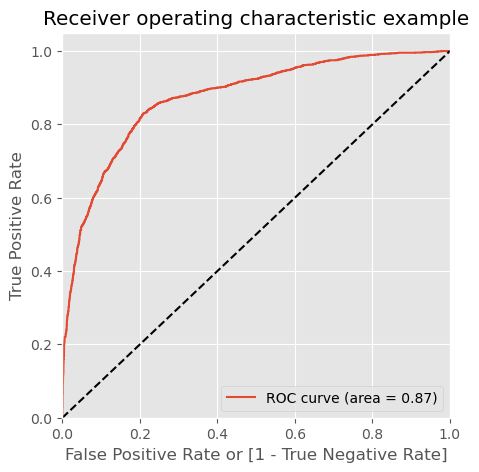

In [89]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

#### Interpretations:

The model has great accuracy as the curve is close to the left sice of the border as compared to the right side of the border. the area under the curve is 87% of the total area.

#### Optimnal Cut-off Point

The point of equilllibirium fir balanced sensitivity and specificity.

In [90]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.207182,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.237922,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.225560,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.768386,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.130633,3934,1,1,0,0,0,0,0,0,0,0


#### Checking possiblity of 'Accuracy', 'Sensitivity' and 'Specificity'

In [91]:
df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])
# from 0 to 0.9 with set size 0.1
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   
for i in var:
    # Creating confusion matrix 
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  
    # Taking the sum of the matrix
    total=sum(sum(cm_matrix))                                                          
    # Storing Accuracy Data 
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     
    # Storing Sensitivity Data
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         
    # Storing Specificity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         
    # Inserting all the data into the dataframe created earlier
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          
# Printing the data
print(df_cutoffs)

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.427489    0.995945     0.077211
0.1          0.1  0.545609    0.978508     0.278861
0.2          0.2  0.681045    0.917275     0.535482
0.3          0.3  0.779530    0.867397     0.725387
0.4          0.4  0.807050    0.795620     0.814093
0.5          0.5  0.805195    0.656123     0.897051
0.6          0.6  0.787106    0.532847     0.943778
0.7          0.7  0.753556    0.402271     0.970015
0.8          0.8  0.719697    0.288727     0.985257
0.9          0.9  0.689394    0.191809     0.996002


#### Plotting the convergent point 

The meeting point for accuracy, specificity, and sensitivity comes out to be 0.8. Howeever, the optimum point for taking probablity cutoff for the meeting point is 0.4 and we will go ahead with it. The trade off between sensitivity and specificity can easily be visualised here.

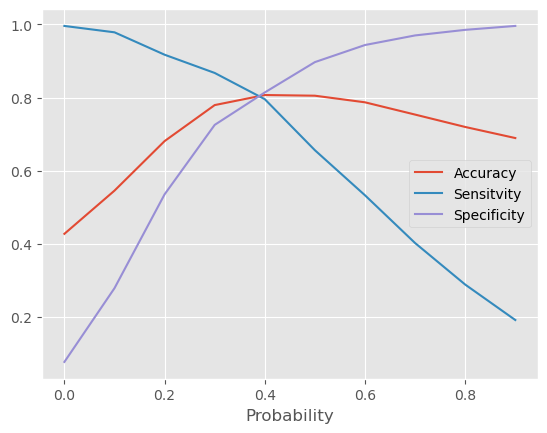

In [92]:
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   
plt.show()

#### Creating new columns with 0.4 as the probablity cutoff

In [93]:
y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )   
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.207182,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.237922,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.225560,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.768386,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.130633,3934,1,1,0,0,0,0,0,0,0,0,0


#### Precision and Recall using confusion matrix

In [94]:
confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3258,  744],
       [ 504, 1962]], dtype=int64)

In [96]:
# Scores
print('Precision:',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))   
print('Recall:',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       

Precision: 0.7250554323725056
Recall: 0.7956204379562044


#### Precision and Recall tradeoff

There is a trade off between the two and they meet at 0.5

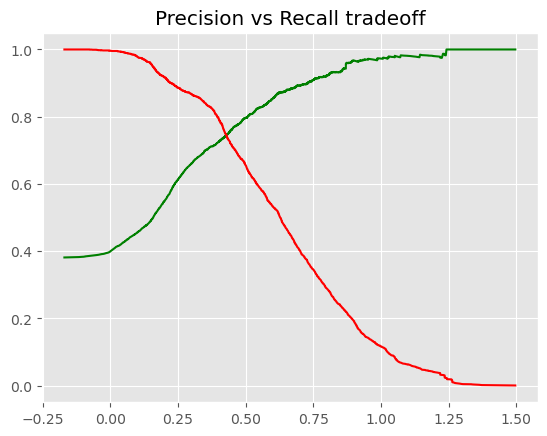

In [97]:
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    
plt.plot(thresholds, r[:-1], "r-")    
plt.show()

#### RFE test 

In [100]:
rf1 = RFE(estimator=logreg, n_features_to_select=15)
rf1= rf1.fit(X_train,y_train)
rf1.support_

array([ True,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False])

In [102]:
#Selecting 'true' columns
col2=X_train.columns[rf1.support_]
X_train_rfe2=sm.add_constant(X_train[col2])

In [103]:
# Model
logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())
reg_rfe2=logis_rfe2.fit()
reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.3
Date:                Sun, 18 Aug 2024   Deviance:                       5450.6
Time:                        14:23:53   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3853
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.4082      1.533     -2.875      0.004      -7.413      -1.403
Lead Number                                            7.58e-06   1.52e-06      5.000      0.000    4.61e-06    1.06e-05
Do Not Email                                            -1.1981      0.167     -7.174      0.000      -1.525      -0.871
Total Time Spent on Website                              0.9764      0.036     27.156      0.000       0.906       1.047
A free copy of Mastering The Interview                  -0.0229      0.095     -0.241      0.810      -0.210       0.164
Lead Origin_Landing Page Submission                     -0.4652      0.089     -5.256      0.000      -0.639      -0.292
Lead Origin_Lead Add Form                                3.7699      0.367     10.266      0.000       3.050       4.490
Lead Source_Direct traffic                              -0.2782      0.098     -2.850      0.004      -0.470      -0.087
Lead Source_Reference                                   -0.6201      0.410     -1.512      0.131      -1.424       0.184
Last Activity_Olark Chat Conversation                   -0.7632      0.170     -4.500      0.000      -1.096      -0.431
Last Activity_SMS Sent                                   0.8212      0.150      5.467      0.000       0.527       1.116
What is your current occupation_Working Professional     2.8181      0.188     14.985      0.000       2.449       3.187
Last Notable Activity_Modified                          -0.7937      0.094     -8.480      0.000      -0.977      -0.610
Last Notable Activity_SMS Sent                           0.6110      0.171      3.569      0.000       0.275       0.947
TotalVisits_0_50                                        -0.8701      1.185     -0.735      0.463      -3.192       1.452
Page Views Per Visit_0_10                               -0.0798      0.370     -0.216      0.829      -0.806       0.646
========================================================================================================================
"""

In [104]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe2[col2].columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2[col2].values,i) for i in range(X_train_rfe2[col2].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
13,TotalVisits_0_50,559.81
0,Lead Number,472.48
14,Page Views Per Visit_0_10,121.59
12,Last Notable Activity_SMS Sent,6.39
9,Last Activity_SMS Sent,6.08
5,Lead Origin_Lead Add Form,4.47
7,Lead Source_Reference,4.26
4,Lead Origin_Landing Page Submission,4.02
3,A free copy of Mastering The Interview,2.62
11,Last Notable Activity_Modified,2.45


In [107]:
# Removing 'Page Views Per Visit_0_10' due to high p-value and VIF. 
X_train_rfe22=X_train_rfe2.drop(['Page Views Per Visit_0_10'],axis=1)

In [108]:
# Creating a new model
X_train_rfe22=sm.add_constant(X_train_rfe22)
logis_rfe22=sm.GLM(y_train,X_train_rfe22,families=sm.families.Binomial())
reg_rfe22=logis_rfe22.fit()
reg_rfe22.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               Identity   Scale:                         0.13965
Method:                          IRLS   Log-Likelihood:                -2803.6
Date:                Sun, 18 Aug 2024   Deviance:                       901.13
Time:                        14:29:58   Pearson chi2:                     901.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1831      0.212     -0.862      0.389      -0.599       0.233
Lead Number                                            9.83e-07   2.06e-07      4.773      0.000    5.79e-07    1.39e-06
Do Not Email                                            -0.1273      0.018     -7.134      0.000      -0.162      -0.092
Total Time Spent on Website                              0.1726      0.005     34.792      0.000       0.163       0.182
A free copy of Mastering The Interview                  -0.0065      0.013     -0.481      0.630      -0.033       0.020
Lead Origin_Landing Page Submission                     -0.0677      0.013     -5.278      0.000      -0.093      -0.043
Lead Origin_Lead Add Form                                0.5906      0.035     16.941      0.000       0.522       0.659
Lead Source_Direct traffic                              -0.0449      0.014     -3.281      0.001      -0.072      -0.018
Lead Source_Reference                                   -0.1334      0.039     -3.417      0.001      -0.210      -0.057
Last Activity_Olark Chat Conversation                   -0.0745      0.018     -4.182      0.000      -0.109      -0.040
Last Activity_SMS Sent                                   0.1146      0.021      5.482      0.000       0.074       0.156
What is your current occupation_Working Professional     0.3507      0.018     19.268      0.000       0.315       0.386
Last Notable Activity_Modified                          -0.1046      0.012     -8.719      0.000      -0.128      -0.081
Last Notable Activity_SMS Sent                           0.1311      0.024      5.432      0.000       0.084       0.178
TotalVisits_0_50                                        -0.0680      0.168     -0.405      0.685      -0.397       0.261
========================================================================================================================
"""

In [109]:
# Dropping 'TotalVisits_0_50' due to high p-value
X_train_rfe23=X_train_rfe22.drop('TotalVisits_0_50',axis=1)

In [110]:
X_train_rfe23=sm.add_constant(X_train_rfe23)
logis_rfe23=sm.GLM(y_train,X_train_rfe23,families=sm.families.Binomial())
reg_rfe23=logis_rfe23.fit()
reg_rfe23.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                         0.13963
Method:                          IRLS   Log-Likelihood:                -2803.7
Date:                Sun, 18 Aug 2024   Deviance:                       901.16
Time:                        14:31:29   Pearson chi2:                     901.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2516      0.129     -1.957      0.050      -0.504       0.000
Lead Number                                           9.838e-07   2.06e-07      4.778      0.000     5.8e-07    1.39e-06
Do Not Email                                            -0.1268      0.018     -7.124      0.000      -0.162      -0.092
Total Time Spent on Website                              0.1726      0.005     34.794      0.000       0.163       0.182
A free copy of Mastering The Interview                  -0.0065      0.013     -0.484      0.629      -0.033       0.020
Lead Origin_Landing Page Submission                     -0.0676      0.013     -5.275      0.000      -0.093      -0.043
Lead Origin_Lead Add Form                                0.5906      0.035     16.942      0.000       0.522       0.659
Lead Source_Direct traffic                              -0.0448      0.014     -3.274      0.001      -0.072      -0.018
Lead Source_Reference                                   -0.1334      0.039     -3.415      0.001      -0.210      -0.057
Last Activity_Olark Chat Conversation                   -0.0744      0.018     -4.180      0.000      -0.109      -0.040
Last Activity_SMS Sent                                   0.1146      0.021      5.482      0.000       0.074       0.156
What is your current occupation_Working Professional     0.3506      0.018     19.268      0.000       0.315       0.386
Last Notable Activity_Modified                          -0.1047      0.012     -8.732      0.000      -0.128      -0.081
Last Notable Activity_SMS Sent                           0.1310      0.024      5.429      0.000       0.084       0.178
========================================================================================================================
"""

In [112]:
# Dropping 'A free copy of Mastering The Interview' due to high p-value
X_train_rfe24=X_train_rfe23.drop('A free copy of Mastering The Interview',axis=1)

In [113]:
X_train_rfe24=sm.add_constant(X_train_rfe24)
logis_rfe24=sm.GLM(y_train,X_train_rfe24,families=sm.families.Binomial())
reg_rfe24=logis_rfe24.fit()
reg_rfe24.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                         0.13961
Method:                          IRLS   Log-Likelihood:                -2803.8
Date:                Sun, 18 Aug 2024   Deviance:                       901.19
Time:                        14:32:55   Pearson chi2:                     901.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2539      0.129     -1.976      0.048      -0.506      -0.002
Lead Number                                           9.872e-07   2.06e-07      4.797      0.000    5.84e-07    1.39e-06
Do Not Email                                            -0.1266      0.018     -7.116      0.000      -0.161      -0.092
Total Time Spent on Website                              0.1726      0.005     34.793      0.000       0.163       0.182
Lead Origin_Landing Page Submission                     -0.0697      0.012     -5.766      0.000      -0.093      -0.046
Lead Origin_Lead Add Form                                0.5907      0.035     16.945      0.000       0.522       0.659
Lead Source_Direct traffic                              -0.0476      0.012     -3.839      0.000      -0.072      -0.023
Lead Source_Reference                                   -0.1335      0.039     -3.419      0.001      -0.210      -0.057
Last Activity_Olark Chat Conversation                   -0.0744      0.018     -4.177      0.000      -0.109      -0.039
Last Activity_SMS Sent                                   0.1146      0.021      5.479      0.000       0.074       0.156
What is your current occupation_Working Professional     0.3506      0.018     19.268      0.000       0.315       0.386
Last Notable Activity_Modified                          -0.1046      0.012     -8.724      0.000      -0.128      -0.081
Last Notable Activity_SMS Sent                           0.1312      0.024      5.437      0.000       0.084       0.179
========================================================================================================================
"""

In [115]:
#VIF
# Dropping constant and saving in new dataset
X_train_rfe0=X_train_rfe24.drop('const',axis=1)
vif=pd.DataFrame()
vif['Features']=X_train_rfe0.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe0.values,i) for i in range(X_train_rfe0.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,Last Notable Activity_SMS Sent,6.34
8,Last Activity_SMS Sent,6.08
0,Lead Number,4.54
4,Lead Origin_Lead Add Form,4.47
6,Lead Source_Reference,4.26
3,Lead Origin_Landing Page Submission,3.56
10,Last Notable Activity_Modified,2.45
5,Lead Source_Direct traffic,1.91
7,Last Activity_Olark Chat Conversation,1.49
9,What is your current occupation_Working Profes...,1.19


In [117]:
# Dropping 'Last Notable Activity_SMS Sent' due to high p-value
X_train_rfe25=X_train_rfe24.drop('Last Notable Activity_SMS Sent',axis=1)

In [118]:
X_train_rfe25=sm.add_constant(X_train_rfe25)
logis_rfe25=sm.GLM(y_train,X_train_rfe25,families=sm.families.Binomial())
reg_rfe25=logis_rfe25.fit()
reg_rfe25.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Gaussian   Df Model:                           11
Link Function:               Identity   Scale:                         0.14023
Method:                          IRLS   Log-Likelihood:                -2818.6
Date:                Sun, 18 Aug 2024   Deviance:                       905.32
Time:                        14:36:04   Pearson chi2:                     905.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4955
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1831      0.128     -1.429      0.153      -0.434       0.068
Lead Number                                           8.914e-07   2.05e-07      4.338      0.000    4.89e-07    1.29e-06
Do Not Email                                            -0.1219      0.018     -6.845      0.000      -0.157      -0.087
Total Time Spent on Website                              0.1737      0.005     34.972      0.000       0.164       0.183
Lead Origin_Landing Page Submission                     -0.0708      0.012     -5.841      0.000      -0.095      -0.047
Lead Origin_Lead Add Form                                0.5940      0.035     17.006      0.000       0.526       0.663
Lead Source_Direct traffic                              -0.0473      0.012     -3.811      0.000      -0.072      -0.023
Lead Source_Reference                                   -0.1351      0.039     -3.452      0.001      -0.212      -0.058
Last Activity_Olark Chat Conversation                   -0.0595      0.018     -3.376      0.001      -0.094      -0.025
Last Activity_SMS Sent                                   0.2119      0.011     19.572      0.000       0.191       0.233
What is your current occupation_Working Professional     0.3554      0.018     19.513      0.000       0.320       0.391
Last Notable Activity_Modified                          -0.1366      0.010    -13.045      0.000      -0.157      -0.116
========================================================================================================================
"""

In [119]:
#VIF
# Dropping constant and saving in new dataset
X_train_rfe0=X_train_rfe25.drop('const',axis=1)
vif=pd.DataFrame()
vif['Features']=X_train_rfe0.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe0.values,i) for i in range(X_train_rfe0.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.47
0,Lead Number,4.36
6,Lead Source_Reference,4.26
3,Lead Origin_Landing Page Submission,3.56
5,Lead Source_Direct traffic,1.91
10,Last Notable Activity_Modified,1.86
8,Last Activity_SMS Sent,1.57
7,Last Activity_Olark Chat Conversation,1.45
9,What is your current occupation_Working Profes...,1.19
1,Do Not Email,1.14


### Final Model: reg_rfe25

As we can see that all the features have a p-vlaue less than 0.05 and VIF less than 5 we can say that we have arrived at the best and most robust model. As all the variables are significant and multicollinearity is below the acceptable level.

### Predicting the train model

In [120]:
y_train_pred1=reg_rfe25.predict(X_train_rfe25)
y_train_pred_final2=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred1,'ID':y_train.index})
y_train_pred_final2.head() 

,Converted,Converted_probability,ID
1871,0,0.234848,1871
6795,0,0.232586,6795
3516,0,0.255542,3516
8105,0,0.719279,8105
3934,0,0.081274,3934


### Plotting the ROC curve

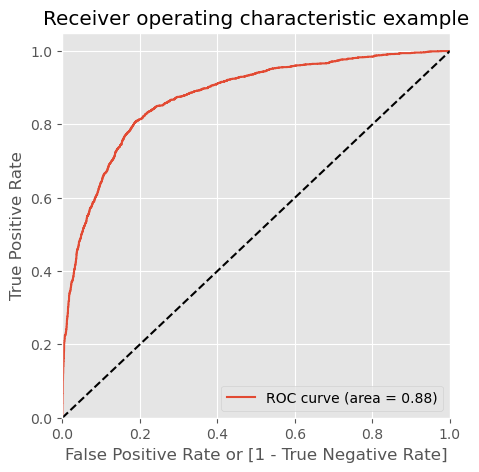

In [121]:
draw_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

#### Interpretation

The curve is closer to the left side as compared to the right side and area under the curve is 88%. With this we can conclude that we have built a highly accurate model. 

**Area under the curve (AOC)** measures how true positive rates and false positive rates tradeoff against each other. Further it indicates at the stability of the model. The larger the area under the curve the better the model will be able to distinguist classes. Our second model with AOC = 88% is better model than our first model.

### Test Dataset

### Scaling the Test Dataset

In [122]:
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

### Predicting the test dataset

In [125]:
test_cols=X_train_8.columns[1:]              
X_test_final=X_test[test_cols]
X_test_final=sm.add_constant(X_test_final)
y_pred_test=model8.predict(X_test_final)

In [126]:
# Creating a new dataset and saving the prediction values in it
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,ID
4269,1,0.655122,4269
2376,1,0.918245,2376
7766,1,0.523668,7766
9199,0,-0.005999,9199
4359,1,0.663867,4359


## 09. Model Evaluation

In [127]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )   
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.655122,4269,1
2376,1,0.918245,2376,1
7766,1,0.523668,7766,1
9199,0,-0.005999,9199,0
4359,1,0.663867,4359,1


In [128]:
# Precision score
print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))
# Recall score
print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Precision score in predicting test dataset: 0.7398444252376837
Recall score in predicting test dataset: 0.7817351598173516


### Lead Score

In [130]:
# Creating new columns for lead number and lead score
y_test_pred_final['Lead Number']=lead.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.655122,4269,1,0,66
2376,1,0.918245,2376,1,0,92
7766,1,0.523668,7766,1,0,52
9199,0,-0.005999,9199,0,0,-1
4359,1,0.663867,4359,1,0,66


## 10.Conclusion

- The model is stable
- The recall score is higher than the precision score
- The accuracy, presision and recall scores are well within the accpetable range
- The model has the ability to adjust to the company's upcoming requirements
- Following are the most important features in lead conversion:
    - Lead Origin_Lead Add Form
    - What is your current occupation_Working Professional
    - Last Activity_SMS Sent	